In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as ppl


In [17]:
json_file = 'SubtaskB\subtaskB_train.jsonl'
tdf = pd.read_json(json_file, lines=True)

In [18]:
print(tdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71027 entries, 0 to 71026
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    71027 non-null  object
 1   model   71027 non-null  object
 2   source  71027 non-null  object
 3   label   71027 non-null  int64 
 4   id      71027 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.7+ MB
None


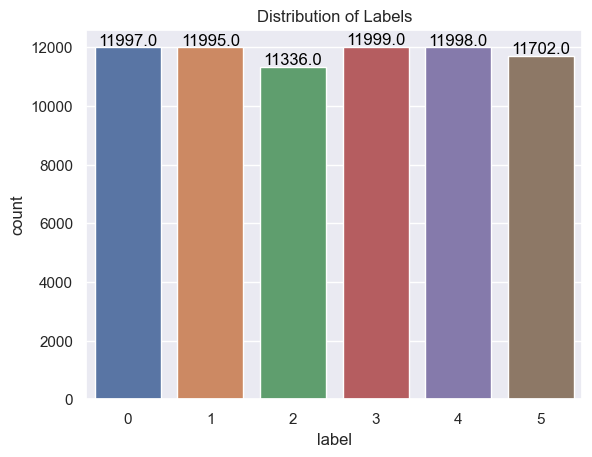

In [19]:
sb.countplot(x='label', data=df)
ppl.title('Distribution of Labels')

for p in ppl.gca().patches:
    ppl.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

ppl.show()

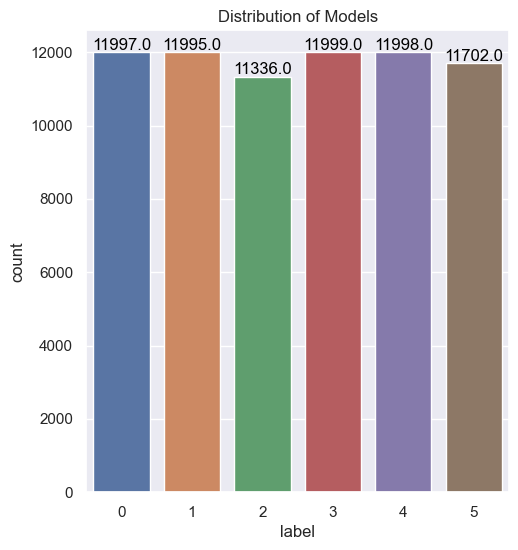

In [20]:
ppl.figure(figsize=(12, 6))
ppl.subplot(1, 2, 1)
sb.countplot(x='label', data=tdf)
ppl.title('Distribution of Models')

for p in ppl.gca().patches:
    ppl.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')


ppl.show()

In [21]:
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import pad_sequences
# from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
import ktrain
from ktrain import text
from keras.utils import to_categorical
sns.set()
# %matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\virin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\virin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\virin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\virin\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\virin\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\virin\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\

True

In [22]:
df = tdf

In [23]:
df['text']=df['text'].fillna("")
df.isna().sum() 

text      0
model     0
source    0
label     0
id        0
dtype: int64

In [26]:
df['lower_case'] = df['text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))
# converts all to lowercase

df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
# deletes non alphabetic characters

df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))
# removes hyperlink

tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)

stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

# df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [27]:
df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ')

In [30]:
df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [31]:
df

,text,model,source,label,id,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,Forza Motorsport is a popular racing game that...,chatGPT,wikihow,1,0,forza motorsport is a popular racing game that...,forza motorsport is a popular racing game that...,forza motorsport is a popular racing game that...,"[forza, motorsport, is, a, popular, racing, ga...","['forza', 'motorsport', 'popular', 'racing', '...","[forza, motorsport, popular, racing, game, pro...",forza motorsport popular racing game provides ...,forza motorsport popular racing game provides ...
1,Buying Virtual Console games for your Nintendo...,chatGPT,wikihow,1,1,buying virtual console games for your nintendo...,buying virtual console games for your nintendo...,buying virtual console games for your nintendo...,"[buying, virtual, console, games, for, your, n...","['buying', 'virtual', 'console', 'games', 'nin...","[buying, virtual, console, games, nintendo, wi...",buying virtual console games nintendo wii fun ...,buying virtual console game nintendo wii fun e...
2,Windows NT 4.0 was a popular operating system ...,chatGPT,wikihow,1,2,windows nt 4.0 was a popular operating system ...,windows nt was a popular operating system ...,windows nt was a popular operating system ...,"[windows, nt, 4, 0, was, a, popular, operating...","['windows', 'nt', '4', '0', 'popular', 'operat...","[windows, nt, popular, operating, system, back...",windows nt popular operating system back day s...,window nt popular operating system back day so...
3,How to Make Perfume\n\nPerfume is a great way ...,chatGPT,wikihow,1,3,how to make perfume perfume is a great way to...,how to make perfume perfume is a great way to...,how to make perfume perfume is a great way to...,"[how, to, make, perfume, perfume, is, a, great...","['make', 'perfume', 'perfume', 'great', 'way',...","[make, perfume, perfume, great, way, enhance, ...",make perfume perfume great way enhance persona...,make perfume perfume great way enhance persona...
4,How to Convert Song Lyrics to a Song'\n\nConve...,chatGPT,wikihow,1,4,how to convert song lyrics to a song' convert...,how to convert song lyrics to a song' convert...,how to convert song lyrics to a song' convert...,"[how, to, convert, song, lyrics, to, a, song, ...","['convert', 'song', 'lyrics', 'song', 'convert...","[convert, song, lyrics, song, converting, song...",convert song lyrics song converting song lyric...,convert song lyric song converting song lyric ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71022,"During the Cold War, the United States was po...",cohere,reddit,2,71022,"during the cold war, the united states was por...",during the cold war the united states was por...,during the cold war the united states was por...,"[during, the, cold, war, the, united, states, ...","['cold', 'war', 'united', 'states', 'portrayed...","[cold, war, united, states, portrayed, ussr, p...",cold war united states portrayed ussr powerful...,cold war united state portrayed ussr powerful ...
71023,"The ""continuity thesis"" is the idea that ther...",cohere,reddit,2,71023,"the ""continuity thesis"" is the idea that there...",the continuity thesis is the idea that there...,the continuity thesis is the idea that there...,"[the, continuity, thesis, is, the, idea, that,...","['continuity', 'thesis', 'idea', 'direct', 'li...","[continuity, thesis, idea, direct, line, conti...",continuity thesis idea direct line continuity ...,continuity thesis idea direct line continuity ...
71024,"In the early Middle Ages, the pagan Norse wer...",cohere,reddit,2,71024,"in the early middle ages, the pagan norse were...",in the early middle ages the pagan norse were...,in the early middle ages the pagan norse were...,"[in, the, early, middle, ages, the, pagan, nor...","['early', 'middle', 'ages', 'pagan', 'norse', ...","[early, middle, ages, pagan, norse, known, pro...",early middle ages pagan norse known prowess tr...,early middle age pagan norse known prowess tra...
7

In [32]:
human_text = df[df['label']==0]
chatGPT_text = df[df['label']==1]
cohere_text = df[df['label']==2]
davinci_text = df[df['label']==3]
bloomz_text = df[df['label']==4]
dolly_text = df[df['label']==5]

In [33]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [34]:
top = Counter([item for sublist in human_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in human_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [35]:
top = Counter([item for sublist in chatGPT_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in chatGPT_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [36]:
top = Counter([item for sublist in cohere_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in cohere_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [37]:
top = Counter([item for sublist in davinci_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in davinci_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [38]:
top = Counter([item for sublist in dolly_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in dolly_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()